In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world shapefile
world = gpd.read_file("../datasets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")[["ISO_A3_EH", "geometry"]]

# Generate 2D grids of lat/lon
j, k = np.meshgrid(np.arange(100), np.arange(200), indexing="ij")
lat = -89.1 + j * 1.8
lon = -179.1 + k * 1.8

# Now both are (100, 200) → flatten properly
points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(lon.ravel(), lat.ravel()),
    crs="EPSG:4326"
)

# Spatial join: assign country code
joined = gpd.sjoin(points, world, how="left", predicate="within")

# Reshape back into grid
country_codes = joined["ISO_A3_EH"].to_numpy().reshape(100, 200)

In [2]:
country_codes = pd.DataFrame(country_codes)
country_codes.to_csv("../datasets/country_codes.csv", index=False, header=False)

In [3]:
PBI2000= pd.read_csv("../datasets/GDP.PCAP.CD.csv")
PBI2000.head(10)

,Country Name,Country Code,2000
0,Aruba,ABW,20681.023030
1,Africa Eastern and Southern,AFE,707.120378
2,Afghanistan,AFG,174.930991
3,Africa Western and Central,AFW,516.932316
4,Angola,AGO,563.733796
5,Albania,ALB,1160.420471
6,Andorra,AND,21810.248740
7,Arab World,ARB,2664.165796
8,United Arab Emirates,ARE,29865.502350
9,Argentina,ARG,7637.014892


In [4]:
# Build a dictionary mapping ISO3 → GDP value
gdp_map = dict(zip(PBI2000["Country Code"], PBI2000["2000"]))

# Replace codes in the grid with GDP values
gdp_grid = country_codes.replace(gdp_map)

# Save to CSV
gdp_grid.to_csv("../datasets/gdp_grid_2000.csv", index=False, header=False)

/tmp/ipykernel_52753/1397797844.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdp_grid = country_codes.replace(gdp_map)


In [5]:
gdp_grid = gdp_grid.apply(pd.to_numeric, errors="coerce")
gdp_array = gdp_grid.fillna(0).to_numpy()

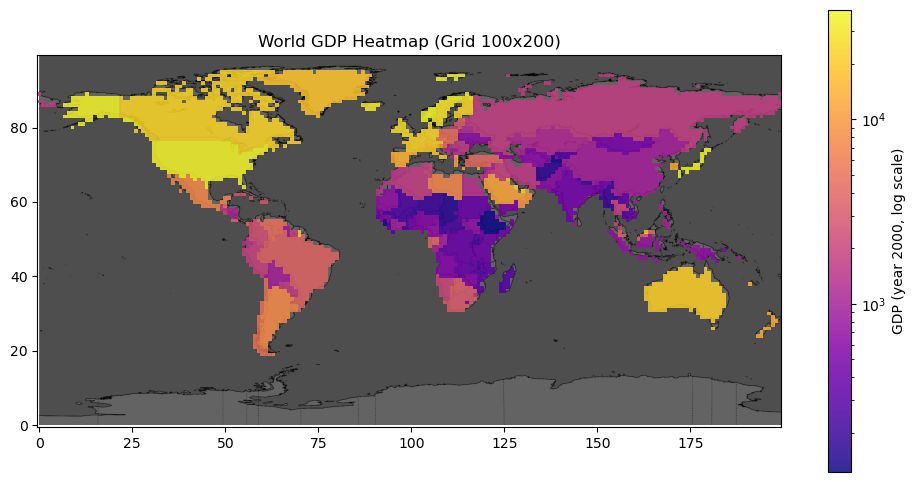

In [6]:
# Plot heatmap
plt.figure(figsize=(12, 6))
cmap = plt.cm.plasma
norm = mcolors.LogNorm(vmin=gdp_array[gdp_array>0].min(), vmax=gdp_array.max())  # log scale for GDP


mapa = mpimg.imread('img/World_location_map_(equirectangular_180).png')
plt.imshow(mapa, extent=[0, gdp_array.shape[1], 0, gdp_array.shape[0]], origin='upper')
im = plt.imshow(gdp_array, cmap=cmap, norm=norm, origin="lower", alpha=0.85)
plt.colorbar(im, label="GDP (year 2000, log scale)")
plt.title("World GDP Heatmap (Grid 100x200)")
plt.show()

In [7]:
POP2000= pd.read_csv("../datasets/POP.DNST.csv")
POP2000.head(10)

,Country Name,Country Code,2000
0,Aruba,ABW,503.266667
1,Africa Eastern and Southern,AFE,33.303511
2,Afghanistan,AFG,30.863847
3,Africa Western and Central,AFW,30.397428
4,Angola,AGO,12.990189
5,Albania,ALB,112.738212
6,Andorra,AND,139.755319
7,Arab World,ARB,25.503970
8,United Arab Emirates,ARE,49.191425
9,Argentina,ARG,13.598173


In [8]:
# Build a dictionary mapping ISO3 → GDP value
pop_map = dict(zip(POP2000["Country Code"], POP2000["2000"]))

# Replace codes in the grid with GDP values
pop_grid = country_codes.replace(pop_map)

# Save to CSV
pop_grid.to_csv("../datasets/pop_grid_2000.csv", index=False, header=False)

In [9]:
pop_grid = pop_grid.apply(pd.to_numeric, errors="coerce")
pop_array = pop_grid.fillna(0).to_numpy()

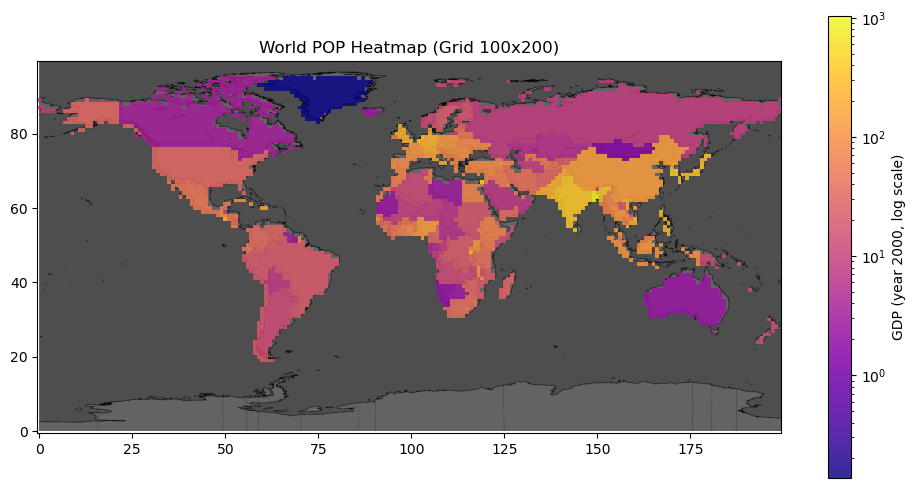

In [10]:
# Plot heatmap
plt.figure(figsize=(12, 6))
cmap = plt.cm.plasma
norm = mcolors.LogNorm(vmin=pop_array[pop_array>0].min(), vmax=pop_array.max())  # log scale for GDP


mapa = mpimg.imread('img/World_location_map_(equirectangular_180).png')
plt.imshow(mapa, extent=[0, pop_array.shape[1], 0, pop_array.shape[0]], origin='upper')
im = plt.imshow(pop_array, cmap=cmap, norm=norm, origin="lower", alpha=0.85)
plt.colorbar(im, label="GDP (year 2000, log scale)")
plt.title("World POP Heatmap (Grid 100x200)")
plt.show()